In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
# train_end_idx = len(df) 
df_test = pd.read_csv('test.csv')

In [3]:
print("train data: ",df.shape)
print("test data: ",df_test.shape)

train data:  (35156, 22)
test data:  (34844, 21)


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2016-07-19,NaN,19.5,NaN,5.69496,0.500000,ENE,61.0,ENE,ENE,...,86.641375,41.810006,1020.4,1021.9,NaN,7.00000,NaN,19.6,0,NaN
1,2010-07-26,Canberra,2.1,15.7,NaN,5.700000,E,26.0,NaN,SE,...,53.275715,76.598048,1023.7,1020.8,4.000000,1.00000,9.0,14.1,0,0.0
2,2014-04-02,Woomera,20.9,36.1,5.69496,NaN,S,39.0,S,SW,...,15.471574,52.163254,1017.1,1014.9,4.167266,4.27812,24.2,33.9,0,0.0
3,2014-11-19,Tuggeranong,11.5,23.9,5.69496,7.993227,NNE,35.0,W,NaN,...,46.442398,67.664733,1010.2,NaN,4.167266,4.27812,13.8,21.8,1,0.2
4,NaN,Hobart,8.2,20.5,3.20000,NaN,N,69.0,N,WNW,...,51.830889,51.770240,NaN,1001.2,7.000000,7.00000,NaN,17.6,0,0.6


# A. drop RISK_MM (attribute highly related rain in future)

In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)
df_test.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
# col_names = df.columns
col_names = [var for var in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 21 columns):
Date             28098 non-null object
Location         27922 non-null object
MinTemp          28089 non-null float64
MaxTemp          28264 non-null float64
Evaporation      28142 non-null float64
Sunshine         28093 non-null float64
WindGustDir      26466 non-null object
WindGustSpeed    28148 non-null float64
WindDir9am       26132 non-null object
WindDir3pm       27424 non-null object
WindSpeed9am     28120 non-null float64
WindSpeed3pm     28143 non-null float64
Humidity9am      28128 non-null float64
Humidity3pm      28064 non-null float64
Pressure9am      28118 non-null float64
Pressure3pm      28060 non-null float64
Cloud9am         28127 non-null float64
Cloud3pm         28208 non-null float64
Temp9am          28092 non-null float64
Temp3pm          28151 non-null float64
RainToday        35156 non-null int64
dtypes: float64(15), int64(1), object(5)
memory usage: 5.6

### ** numerical attribute **

In [8]:
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical.remove('RainToday')
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### ** categorical attribute **

In [9]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


# B. split data

In [10]:
## 80%, 20%
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns = ['RainToday']).values, df['RainToday'].values, test_size=0.2)

In [11]:
print("train set: ", X_train.shape)
print("validation set: ",X_val.shape)

train set:  (28124, 20)
validation set:  (7032, 20)


In [12]:
# remove lable
col_names.remove('RainToday')
col_names

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [13]:
## transfer data to dataframe
def transfer_to_df(numpy_data, attribute):
    data_process = pd.DataFrame(numpy_data)
    data_process.columns = attribute
    return data_process

In [14]:
X_train = transfer_to_df(X_train, col_names)
X_val = transfer_to_df(X_val, col_names)
df_test = transfer_to_df(df_test, col_names)

# C. Missing value

### **************   KNN    ***************************
##### KNN only can deal numerical data, categorical data need to some preprocess due to use API

## 1. deal categorical data

In [15]:
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
from sklearn.preprocessing import LabelEncoder

#### 1) fill value to nan

Location

In [16]:
# check labels in Location variable
X_train.Location.unique()

array([nan, 'Bendigo', 'CoffsHarbour', 'Woomera', 'Williamtown',
       'NorahHead', 'Witchcliffe', 'Perth', 'MelbourneAirport',
       'Watsonia', 'AliceSprings', 'Darwin', 'Brisbane', 'SydneyAirport',
       'Walpole', 'WaggaWagga', 'Hobart', 'Albury', 'Cobar', 'Mildura',
       'Nuriootpa', 'PearceRAAF', 'Launceston', 'Richmond', 'GoldCoast',
       'Adelaide', 'PerthAirport', 'MountGambier', 'MountGinini',
       'Newcastle', 'Dartmoor', 'Cairns', 'Ballarat', 'NorfolkIsland',
       'BadgerysCreek', 'Wollongong', 'Sale', 'Nhil', 'Townsville',
       'Katherine', 'Moree', 'Tuggeranong', 'SalmonGums', 'Albany',
       'Melbourne', 'Canberra', 'Penrith', 'Sydney', 'Portland', 'Uluru'],
      dtype=object)

In [17]:
X_train['Location'] = X_train['Location'].fillna('city')
X_val['Location'] = X_val['Location'].fillna('city')
df_test['Location'] = df_test['Location'].fillna('city')

WindGustDir

In [18]:
# check labels in WindGustDir variable
X_train['WindGustDir'].unique()

array(['ENE', 'N', 'SSW', 'SSE', 'NW', 'WSW', nan, 'SE', 'ESE', 'WNW',
       'SW', 'NNE', 'NNW', 'NE', 'S', 'E', 'W'], dtype=object)

In [19]:
X_train['WindGustDir'] = X_train['WindGustDir'].fillna('NSWE')
X_val['WindGustDir'] = X_val['WindGustDir'].fillna('NSWE')
df_test['WindGustDir'] = df_test['WindGustDir'].fillna('NSWE')

WindDir9am

In [20]:
# check labels in WindDir9am variable
X_train['WindDir9am'].unique()

array(['SSW', 'N', 'WSW', nan, 'NW', 'NNW', 'NNE', 'S', 'W', 'ESE', 'SE',
       'ENE', 'SW', 'NE', 'WNW', 'SSE', 'E'], dtype=object)

In [21]:
X_train['WindDir9am'] = X_train['WindDir9am'].fillna('NSWE')
X_val['WindDir9am'] = X_val['WindDir9am'].fillna('NSWE')
df_test['WindDir9am'] = df_test['WindDir9am'].fillna('NSWE')

WindDir3pm

In [22]:
# check labels in WindDir3pm variable
X_train['WindDir3pm'].unique()

array(['NE', 'N', nan, 'SE', 'SSW', 'NW', 'SW', 'S', 'WNW', 'W', 'NNW',
       'SSE', 'WSW', 'ENE', 'ESE', 'E', 'NNE'], dtype=object)

In [23]:
X_train['WindDir3pm'] = X_train['WindDir3pm'].fillna('NSWE')
X_val['WindDir3pm'] = X_val['WindDir3pm'].fillna('NSWE')
df_test['WindDir3pm'] = df_test['WindDir3pm'].fillna('NSWE')

Date

In [24]:
# check labels in WindDir3pm variable
X_train['Date'].unique()

array(['2011-03-30', '2016-09-10', '2017-06-18', ..., '2015-05-11',
       '2008-12-14', '2008-08-30'], dtype=object)

In [25]:
X_train['Date'] = X_train['Date'].fillna('0')
X_val['Date'] = X_val['Date'].fillna('0')
df_test['Date'] = df_test['Date'].fillna('0')

In [26]:
X_train['Date'].count()

28124

In [27]:
'''
input: date attribute
output: ndarray
'''

def fillna_date(dataframe):
    x = 0
    size = dataframe['Date'].count()
    date_data = np.zeros(size, dtype = np.int)
    # len(date_data)

    for data_ori in dataframe['Date']:
        if data_ori != '0':
            date_arr = data_ori.split("-")
            post_date = date_arr[0] + date_arr[1]
            date_data[x] = post_date
        x += 1
    dataframe = pd.DataFrame(date_data)
    return dataframe

In [28]:
X_train['Date'] = fillna_date(X_train)
X_train

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201103,city,13.3,26.8,3.4,10.7,ENE,NaN,SSW,NE,11,19,56.519,56.6618,1018.4,1014.9,1,1,NaN,25.7
1,201609,Bendigo,8.3,16.7,0.4,7.99323,N,57,N,N,15,28,NaN,82.2269,NaN,1006.2,8,6,9,15.7
2,201706,CoffsHarbour,8.4,25.1,5.69496,7.99323,SSW,43,WSW,NSWE,17,NaN,58.9163,42.6568,1010.1,1008,NaN,1,NaN,NaN
3,0,Woomera,19.4,NaN,9.6,1.2,ENE,NaN,NSWE,NE,15,20,NaN,NaN,NaN,1010.1,NaN,7,23.1,19.2
4,201703,Williamtown,19.3,32.6,7.2,7.2,SSE,56,NW,SE,NaN,30,48.3982,34.8189,1009.1,1009,7,3,25.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0,city,18.1,NaN,NaN,10.4,SE,NaN,S,ESE,19,28,NaN,59.0847,1020.3,NaN,2,NaN,22.8,25.8
28120,201205,city,NaN,37.3,5.69496,7.99323,NW,56,N,WNW,30,31,13.7696,48.5487,1010,1006.9,7,6,NaN,37
28121,201105,Hobart,8.6,20.3,NaN,11.9,SSE,43,NSWE,ESE,NaN,19,46.5612,NaN,1024.3,NaN,NaN,4.27812,NaN,19
28122,201604,Adelaide,29,41.7,13.2,4.6,ESE,52,NE,WSW,13,11,6.78133,40.04,1009.8,1008,4.16727,NaN,35.5,41.1


In [29]:
X_val['Date'] = fillna_date(X_val)
X_val

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201010,Canberra,-1.1,15.6,5.69496,7.99323,NNW,37,NSWE,NW,0,NaN,62.3093,71.1511,1023.6,1018.8,NaN,4.27812,5.4,14.2
1,201610,MelbourneAirport,5.4,NaN,2.8,NaN,NSWE,56,WSW,WSW,35,26,70.0819,61.9355,1013.3,1010.1,7,8,7.6,11.9
2,200910,MelbourneAirport,6,13,0.6,5.8,S,NaN,NSWE,S,6,19,NaN,64.465,1012.3,NaN,7,6,8.5,11.4
3,0,Cairns,24,NaN,8,10.6,ENE,30,W,ENE,9,17,72.5931,46.8782,1006,1003.2,5,3,28.8,30.3
4,201604,Bendigo,2,14.7,NaN,7.99323,NSWE,33,NSWE,NW,0,NaN,57.3203,NaN,1016.6,1014.7,NaN,3,7.3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,201203,Hobart,7.8,NaN,1.2,NaN,NSWE,NaN,NNW,NNW,24,20,53.3163,68.3246,1017.1,1013.3,7,5,12.2,22.1571
7028,201412,city,19.8,25,NaN,0,SSE,39,E,ENE,20,NaN,52.8058,55.83,NaN,NaN,8,8,21.4,22.9
7029,201604,Perth,NaN,41,16,12.2,NW,NaN,N,WSW,17,17,27.071,33.9426,1007.4,1008,1,NaN,39,NaN
7030,201310,city,23.1,NaN,4.6,10.1,ENE,39,SE,NSWE,9,28,62.1122,58.7385,NaN,1014.7,4,NaN,27.5,NaN


In [30]:
df_test['Date'] = fillna_date(df_test)
df_test

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,201307,Tuggeranong,NaN,NaN,5.69496,NaN,N,19.0,NSWE,N,0.0,4.0,43.432433,74.253446,1025.3,1022.0,4.167266,4.27812,9.4,NaN
1,201503,Darwin,17.9,31.4,7.20000,11.000000,NSWE,37.0,NSWE,NW,20.0,NaN,30.315765,NaN,1015.8,1010.7,0.000000,0.00000,23.1,NaN
2,201706,Albury,9.9,24.9,5.69496,7.993227,NSWE,NaN,NSWE,SSE,0.0,19.0,44.068918,68.299536,1025.8,1022.0,NaN,4.27812,17.4,NaN
3,200802,Sale,NaN,22.0,3.60000,8.800000,WNW,NaN,NW,NSWE,11.0,19.0,NaN,NaN,1021.3,1017.4,3.000000,3.00000,10.1,NaN
4,201411,city,24.0,NaN,5.40000,7.300000,S,30.0,SE,SE,NaN,NaN,65.558591,58.146710,1008.4,1006.1,3.000000,NaN,NaN,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,201610,Moree,20.1,32.2,NaN,10.800000,NE,48.0,NSWE,NNE,35.0,NaN,40.373215,62.618689,1018.1,NaN,NaN,6.00000,23.9,30.1
34840,201605,Adelaide,22.2,35.4,5.69496,5.100000,NW,NaN,NE,SW,9.0,9.0,30.101395,49.509689,NaN,1006.5,4.167266,4.27812,NaN,32.9
34841,0,city,NaN,NaN,NaN,7.993227,WSW,24.0,ESE,WSW,6.0,13.0,60.326432,78.393383,NaN,1020.1,4.167266,4.27812,14.2,21.5
34842,0,CoffsHarbour,14.1,20.3,6.40000,8.000000,NSWE,30.0,NSWE,ESE,20.0,NaN,NaN,47.026284,1017.2,1012.8,NaN,4.00000,18.0,19.2


#### 2) Lable encode

##### Encoding....

In [31]:
def get_attri_dict(dataframe, attri):
    attri_dict = {}
    attri_arr = dataframe[attri].unique()
#     print(attri_arr)
    x = 0
    for i in attri_arr:
        attri_dict[i] = x
        x += 1
    
    return attri_dict

In [32]:
def get_data_attri_dict(data):
    
    Date_dict = get_attri_dict(data, "Date")
    Location_dict = get_attri_dict(data, "Location")
    WindGustDir_dict = get_attri_dict(data, "WindGustDir")
    WindDir9am_dict = get_attri_dict(data, "WindDir9am")
    WindDir3pm_dict = get_attri_dict(data, "WindDir3pm")
    
    return Date_dict, Location_dict, WindGustDir_dict, WindDir9am_dict, WindDir3pm_dict

In [33]:
X_train_Date_dict, X_train_Location_dict, X_train_WindGustDir_dict, X_train_WindDir9am_dict, X_train_WindDir3pm_dict = get_data_attri_dict(X_train)

In [34]:
X_val_Date_dict, X_val_Location_dict, X_val_WindGustDir_dict, X_val_WindDir9am_dict, X_val_WindDir3pm_dict = get_data_attri_dict(X_val)

In [35]:
df_test_Date_dict, df_test_Location_dict, df_test_WindGustDir_dict, df_test_WindDir9am_dict, df_test_WindDir3pm_dict = get_data_attri_dict(df_test)

In [36]:
def lable_encode(dataframe, attri, attri_dict):
    x = 0

    size = dataframe[attri].count()
    data_arri = np.zeros(size, dtype = np.int)

    for val in dataframe[attri]:
        data_arri[x] = attri_dict[val]
        x += 1
        
    dataframe = pd.DataFrame(data_arri)
    return dataframe

In [37]:
## train set

X_train['Date'] = lable_encode(X_train, "Date", X_train_Date_dict)
X_train['Location'] = lable_encode(X_train, "Location", X_train_Location_dict)
X_train['WindGustDir'] = lable_encode(X_train, "WindGustDir", X_train_WindGustDir_dict)
X_train['WindDir9am'] = lable_encode(X_train, "WindDir9am", X_train_WindDir9am_dict)
X_train['WindDir3pm'] = lable_encode(X_train, "WindDir3pm", X_train_WindDir3pm_dict)

In [38]:
## validation set

X_val['Date'] = lable_encode(X_val, "Date", X_val_Date_dict)
X_val['Location'] = lable_encode(X_val, "Location", X_val_Location_dict)
X_val['WindGustDir'] = lable_encode(X_val, "WindGustDir", X_val_WindGustDir_dict)
X_val['WindDir9am'] = lable_encode(X_val, "WindDir9am", X_val_WindDir9am_dict)
X_val['WindDir3pm'] = lable_encode(X_val, "WindDir3pm", X_val_WindDir3pm_dict)

In [39]:
## testing set

df_test['Date'] = lable_encode(df_test, "Date", df_test_Date_dict)
df_test['Location'] = lable_encode(df_test, "Location", df_test_Location_dict)
df_test['WindGustDir'] = lable_encode(df_test, "WindGustDir", df_test_WindGustDir_dict)
df_test['WindDir9am'] = lable_encode(df_test, "WindDir9am", df_test_WindDir9am_dict)
df_test['WindDir3pm'] = lable_encode(df_test, "WindDir3pm", df_test_WindDir3pm_dict)

##### extract missing value lable....

In [40]:
fillnan_val = [0, 'city', 'NSWE', 'NSWE', 'NSWE']

In [41]:
def get_missing_val_label(attri_dict, fill_val, attri):
    
    lable = attri_dict[fill_val]
#     print(lable)
    return attri, lable


In [42]:
## train set

attri_date, lable_date = get_missing_val_label(X_train_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(X_train_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(X_train_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(X_train_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(X_train_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict = {'Train set': [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]}

In [43]:
## validation set

attri_date, lable_date = get_missing_val_label(X_val_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(X_val_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(X_val_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(X_val_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(X_val_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict['validation set'] = [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]

In [44]:
## testing set

attri_date, lable_date = get_missing_val_label(df_test_Date_dict, fillnan_val[0], "Date")
attri_location, lable_location = get_missing_val_label(df_test_Location_dict, fillnan_val[1], "Location")
attri_WindDir, lable_WindDir = get_missing_val_label(df_test_WindGustDir_dict, fillnan_val[2], "WindGustDir")
attri_WindDir9, lable_WindDir9 = get_missing_val_label(df_test_WindDir9am_dict, fillnan_val[3], "WindDir9am")
attri_WindDir3, lable_WindDir3 = get_missing_val_label(df_test_WindDir3pm_dict, fillnan_val[4], "WindDir3pm")

showinfo_dict['testing set'] = [(attri_date, lable_date), (attri_location, lable_location), (attri_WindDir, lable_WindDir),
                (attri_WindDir9, lable_WindDir9), (attri_WindDir3, lable_WindDir3)]

#### ** show missing value label in each set

In [45]:
showinfo_dict

{'Train set': [('Date', 3),
  ('Location', 0),
  ('WindGustDir', 6),
  ('WindDir9am', 3),
  ('WindDir3pm', 2)],
 'testing set': [('Date', 12),
  ('Location', 4),
  ('WindGustDir', 1),
  ('WindDir9am', 0),
  ('WindDir3pm', 3)],
 'validation set': [('Date', 3),
  ('Location', 6),
  ('WindGustDir', 1),
  ('WindDir9am', 0),
  ('WindDir3pm', 5)]}

#### 3) fill back nan to categorical attribute preprocess for KNN

In [46]:
def fill_back_nan(dataframe, attri, label):
    x = 0
    size = dataframe[attri].count()
    data_arr = np.zeros(size)
    # len(date_data)

    for idx in dataframe[attri]:
        if idx == label:
            data_arr[x] = np.nan
        else:
            data_arr[x] = idx
        x += 1
    dataframe = pd.DataFrame(data_arr)
    return dataframe

# x = 0
# date_data = np.zeros(6)
# for idx in X_train['Date']:
#     if x < 5:
#         if idx == 3:
#             date_data[x] = np.nan
#         else:
#             date_data[x] = idx
#     else:
#         break
#     x += 1
    
# date_data
# # X_train['Date']

In [47]:
## train set

X_train['Date'] = fill_back_nan(X_train, "Date", showinfo_dict['Train set'][0][1])
X_train['Location'] = fill_back_nan(X_train, "Location", showinfo_dict['Train set'][1][1])
X_train['WindGustDir'] = fill_back_nan(X_train, "WindGustDir", showinfo_dict['Train set'][2][1])
X_train['WindDir9am'] = fill_back_nan(X_train, "WindDir9am", showinfo_dict['Train set'][3][1])
X_train['WindDir3pm'] = fill_back_nan(X_train, "WindDir3pm", showinfo_dict['Train set'][4][1])

In [48]:
## validation set

X_val['Date'] = fill_back_nan(X_val, "Date", showinfo_dict['testing set'][0][1])
X_val['Location'] = fill_back_nan(X_val, "Location", showinfo_dict['testing set'][1][1])
X_val['WindGustDir'] = fill_back_nan(X_val, "WindGustDir", showinfo_dict['testing set'][2][1])
X_val['WindDir9am'] = fill_back_nan(X_val, "WindDir9am", showinfo_dict['testing set'][3][1])
X_val['WindDir3pm'] = fill_back_nan(X_val, "WindDir3pm", showinfo_dict['testing set'][4][1])

In [49]:
## testing set

df_test['Date'] = fill_back_nan(df_test, "Date", showinfo_dict['validation set'][0][1])
df_test['Location'] = fill_back_nan(df_test, "Location", showinfo_dict['validation set'][1][1])
df_test['WindGustDir'] = fill_back_nan(df_test, "WindGustDir", showinfo_dict['validation set'][2][1])
df_test['WindDir9am'] = fill_back_nan(df_test, "WindDir9am", showinfo_dict['validation set'][3][1])
df_test['WindDir3pm'] = fill_back_nan(df_test, "WindDir3pm", showinfo_dict['validation set'][4][1])

In [50]:
X_train

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,NaN,13.3,26.8,3.4,10.7,0.0,NaN,0.0,0.0,11,19,56.519,56.6618,1018.4,1014.9,1,1,NaN,25.7
1,1.0,1.0,8.3,16.7,0.4,7.99323,1.0,57,1.0,1.0,15,28,NaN,82.2269,NaN,1006.2,8,6,9,15.7
2,2.0,2.0,8.4,25.1,5.69496,7.99323,2.0,43,2.0,NaN,17,NaN,58.9163,42.6568,1010.1,1008,NaN,1,NaN,NaN
3,NaN,3.0,19.4,NaN,9.6,1.2,0.0,NaN,NaN,0.0,15,20,NaN,NaN,NaN,1010.1,NaN,7,23.1,19.2
4,4.0,4.0,19.3,32.6,7.2,7.2,3.0,56,4.0,3.0,NaN,30,48.3982,34.8189,1009.1,1009,7,3,25.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,NaN,NaN,18.1,NaN,NaN,10.4,7.0,NaN,7.0,14.0,19,28,NaN,59.0847,1020.3,NaN,2,NaN,22.8,25.8
28120,80.0,NaN,NaN,37.3,5.69496,7.99323,4.0,56,1.0,8.0,30,31,13.7696,48.5487,1010,1006.9,7,6,NaN,37
28121,22.0,16.0,8.6,20.3,NaN,11.9,3.0,43,NaN,14.0,NaN,19,46.5612,NaN,1024.3,NaN,NaN,4.27812,NaN,19
28122,34.0,25.0,29,41.7,13.2,4.6,8.0,52,13.0,12.0,13,11,6.78133,40.04,1009.8,1008,4.16727,NaN,35.5,41.1


In [51]:
X_val

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,-1.1,15.6,5.69496,7.99323,0.0,37,NaN,0.0,0,NaN,62.3093,71.1511,1023.6,1018.8,NaN,4.27812,5.4,14.2
1,1.0,1.0,5.4,NaN,2.8,NaN,NaN,56,1.0,1.0,35,26,70.0819,61.9355,1013.3,1010.1,7,8,7.6,11.9
2,2.0,1.0,6,13,0.6,5.8,2.0,NaN,NaN,2.0,6,19,NaN,64.465,1012.3,NaN,7,6,8.5,11.4
3,3.0,2.0,24,NaN,8,10.6,3.0,30,2.0,NaN,9,17,72.5931,46.8782,1006,1003.2,5,3,28.8,30.3
4,4.0,3.0,2,14.7,NaN,7.99323,NaN,33,NaN,0.0,0,NaN,57.3203,NaN,1016.6,1014.7,NaN,3,7.3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,96.0,5.0,7.8,NaN,1.2,NaN,NaN,NaN,13.0,6.0,24,20,53.3163,68.3246,1017.1,1013.3,7,5,12.2,22.1571
7028,63.0,6.0,19.8,25,NaN,0,6.0,39,9.0,NaN,20,NaN,52.8058,55.83,NaN,NaN,8,8,21.4,22.9
7029,4.0,17.0,NaN,41,16,12.2,4.0,NaN,6.0,1.0,17,17,27.071,33.9426,1007.4,1008,1,NaN,39,NaN
7030,21.0,6.0,23.1,NaN,4.6,10.1,3.0,39,11.0,5.0,9,28,62.1122,58.7385,NaN,1014.7,4,NaN,27.5,NaN


In [52]:
df_test

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,NaN,NaN,5.69496,NaN,0.0,19.0,NaN,0.0,0.0,4.0,43.432433,74.253446,1025.3,1022.0,4.167266,4.27812,9.4,NaN
1,1.0,1.0,17.9,31.4,7.20000,11.000000,NaN,37.0,NaN,1.0,20.0,NaN,30.315765,NaN,1015.8,1010.7,0.000000,0.00000,23.1,NaN
2,2.0,2.0,9.9,24.9,5.69496,7.993227,NaN,NaN,NaN,2.0,0.0,19.0,44.068918,68.299536,1025.8,1022.0,NaN,4.27812,17.4,NaN
3,NaN,3.0,NaN,22.0,3.60000,8.800000,2.0,NaN,1.0,3.0,11.0,19.0,NaN,NaN,1021.3,1017.4,3.000000,3.00000,10.1,NaN
4,4.0,4.0,24.0,NaN,5.40000,7.300000,3.0,30.0,2.0,4.0,NaN,NaN,65.558591,58.146710,1008.4,1006.1,3.000000,NaN,NaN,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,7.0,35.0,20.1,32.2,NaN,10.800000,6.0,48.0,NaN,NaN,35.0,NaN,40.373215,62.618689,1018.1,NaN,NaN,6.00000,23.9,30.1
34840,40.0,11.0,22.2,35.4,5.69496,5.100000,14.0,NaN,15.0,9.0,9.0,9.0,30.101395,49.509689,NaN,1006.5,4.167266,4.27812,NaN,32.9
34841,12.0,4.0,NaN,NaN,NaN,7.993227,4.0,24.0,14.0,16.0,6.0,13.0,60.326432,78.393383,NaN,1020.1,4.167266,4.27812,14.2,21.5
34842,12.0,47.0,14.1,20.3,6.40000,8.000000,NaN,30.0,NaN,10.0,20.0,NaN,NaN,47.026284,1017.2,1012.8,NaN,4.00000,18.0,19.2


## 2. do KNN to fill whole attributes missing value reasonable

In [53]:
def KNN_fillna(dataframe):
    imputer = KNNImputer()
    df_fillna = imputer.fit_transform(dataframe)
    return df_fillna

In [54]:
X_train_knn = KNN_fillna(X_train)

In [55]:
X_train_knn

array([[ 0.        , 17.        , 13.3       , ...,  1.        ,
        19.88      , 25.7       ],
       [ 1.        ,  1.        ,  8.3       , ...,  6.        ,
         9.        , 15.7       ],
       [ 2.        ,  2.        ,  8.4       , ...,  1.        ,
        16.6       , 20.48      ],
       ...,
       [22.        , 16.        ,  8.6       , ...,  4.27812027,
        12.9       , 19.        ],
       [34.        , 25.        , 29.        , ...,  3.96687216,
        35.5       , 41.1       ],
       [49.        , 28.        ,  1.5       , ...,  4.27812027,
         9.2       , 16.        ]])

In [56]:
X_val_knn = KNN_fillna(X_val)

In [57]:
X_val_knn

array([[ 0.        ,  0.        , -1.1       , ...,  4.27812027,
         5.4       , 14.2       ],
       [ 1.        ,  1.        ,  5.4       , ...,  8.        ,
         7.6       , 11.9       ],
       [ 2.        ,  1.        ,  6.        , ...,  6.        ,
         8.5       , 11.4       ],
       ...,
       [ 4.        , 17.        , 19.24      , ...,  4.05562405,
        39.        , 35.44      ],
       [21.        ,  6.        , 23.1       , ...,  3.96687216,
        27.5       , 28.2       ],
       [75.        , 24.        ,  3.        , ...,  2.96687216,
         7.2       , 13.4       ]])

In [58]:
df_test_knn = KNN_fillna(df_test)

In [59]:
df_test_knn

array([[ 0.        ,  0.        ,  3.28      , ...,  4.27812027,
         9.4       , 18.66      ],
       [ 1.        ,  1.        , 17.9       , ...,  0.        ,
        23.1       , 31.3       ],
       [ 2.        ,  2.        ,  9.9       , ...,  4.27812027,
        17.4       , 22.92      ],
       ...,
       [12.        ,  4.        ,  8.42      , ...,  4.27812027,
        14.2       , 21.5       ],
       [12.        , 47.        , 14.1       , ...,  4.        ,
        18.        , 19.2       ],
       [12.        ,  4.        ,  2.        , ...,  4.27812027,
         9.7       , 19.1       ]])

## 3. round KNN fill value in categorical attribute

In [60]:
knn_column = [var for var in X_train.columns]
knn_column

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [61]:
X_train_knn = transfer_to_df(X_train_knn, col_names)
X_val_knn = transfer_to_df(X_val_knn, col_names)
df_test_knn = transfer_to_df(df_test_knn, col_names)

In [62]:
# round 
def round_df_attri(dataframe):
    
    for attri in categorical:
#         dataframe[attri] = dataframe[attri].round(decimals=1)
#         dataframe.round({attri:0})
        dataframe[attri] = dataframe[attri].apply(np.ceil)
    return dataframe

# df.round({"A":1, "B":2, "C":3, "D":4}) 
# X_train_knn[categorical]

In [63]:
# print(kkkkkkkkk)
# X_train_knn

In [64]:
# X_train_knn

In [65]:
# test = X_train_knn
# test = round_df_attri(test)

In [66]:
# test

In [67]:
# X_val_knn

In [68]:
# test_val = X_val_knn
# test = round_df_attri(test)

In [69]:
# test

In [70]:
X_train_knn = round_df_attri(X_train_knn)
X_train_knn

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,17.0,13.30,26.80,3.400000,10.700000,0.0,36.67663,0.0,0.0,11.0,19.0,56.518965,56.661750,1018.400000,1014.900000,1.000000,1.000000,19.88,25.70
1,1.0,1.0,8.30,16.70,0.400000,7.993227,1.0,57.00000,1.0,1.0,15.0,28.0,49.086059,82.226881,1019.060000,1006.200000,8.000000,6.000000,9.00,15.70
2,2.0,2.0,8.40,25.10,5.694960,7.993227,2.0,43.00000,2.0,8.0,17.0,21.0,58.916279,42.656798,1010.100000,1008.000000,5.300360,1.000000,16.60,20.48
3,55.0,3.0,19.40,28.86,9.600000,1.200000,0.0,43.60000,5.0,0.0,15.0,20.0,43.574559,51.203484,1016.126854,1010.100000,4.433453,7.000000,23.10,19.20
4,4.0,4.0,19.30,32.60,7.200000,7.200000,3.0,56.00000,4.0,3.0,15.2,30.0,48.398191,34.818907,1009.100000,1009.000000,7.000000,3.000000,25.20,26.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,48.0,31.0,18.10,26.74,6.298992,10.400000,7.0,39.80000,7.0,14.0,19.0,28.0,51.549353,59.084741,1020.300000,1015.640000,2.000000,1.200000,22.80,25.80
28120,80.0,23.0,14.46,37.30,5.694960,7.993227,4.0,56.00000,1.0,8.0,30.0,31.0,13.769576,48.548665,1010.000000,1006.900000,7.000000,6.000000,24.94,37.00
28121,22.0,16.0,8.60,20.30,4.298992,11.900000,3.0,43.00000,9.0,14.0,16.4,19.0,46.561157,65.648960,1024.300000,1020.780000,1.633453,4.278120,12.90,19.00
28122,34.0,25.0,29.00,41.70,13.200000,4.600000,8.0,52.00000,13.0,12.0,13.0,11.0,6.781329,40.039979,1009.800000,1008.000000,4.167266,3.966872,35.50,41.10


In [71]:
X_val_knn = round_df_attri(X_val_knn)
X_val_knn

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,-1.10,15.60,5.694960,7.993227,0.0,37.0,10.0,0.0,0.0,19.600000,62.309313,71.151101,1023.600000,1018.80,5.466906,4.278120,5.4,14.200000
1,1.0,1.0,5.40,15.90,2.800000,3.758645,6.0,56.0,1.0,1.0,35.0,26.000000,70.081935,61.935520,1013.300000,1010.10,7.000000,8.000000,7.6,11.900000
2,2.0,1.0,6.00,13.00,0.600000,5.800000,2.0,41.4,8.0,2.0,6.0,19.000000,57.992716,64.464996,1012.300000,1018.16,7.000000,6.000000,8.5,11.400000
3,3.0,2.0,24.00,31.24,8.000000,10.600000,3.0,30.0,2.0,10.0,9.0,17.000000,72.593096,46.878175,1006.000000,1003.20,5.000000,3.000000,28.8,30.300000
4,4.0,3.0,2.00,14.70,3.797984,7.993227,6.0,33.0,9.0,0.0,0.0,18.000000,57.320306,65.670578,1016.600000,1014.70,5.633453,3.000000,7.3,14.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,96.0,5.0,7.80,23.28,1.200000,7.814582,7.0,39.2,13.0,6.0,24.0,20.000000,53.316316,68.324604,1017.100000,1013.30,7.000000,5.000000,12.2,22.157059
7028,63.0,6.0,19.80,25.00,5.637984,0.000000,6.0,39.0,9.0,9.0,20.0,16.887176,52.805844,55.829977,1019.060000,1014.90,8.000000,8.000000,21.4,22.900000
7029,4.0,17.0,19.24,41.00,16.000000,12.200000,4.0,43.6,6.0,1.0,17.0,17.000000,27.071005,33.942617,1007.400000,1008.00,1.000000,4.055624,39.0,35.440000
7030,21.0,6.0,23.10,29.46,4.600000,10.100000,3.0,39.0,11.0,5.0,9.0,28.000000,62.112243,58.738494,1014.546854,1014.70,4.000000,3.966872,27.5,28.200000


In [72]:
df_test_knn = round_df_attri(df_test_knn)
df_test_knn

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,0.0,3.28,17.12,5.694960,7.993227,0.0,19.00000,10.0,0.0,0.0,4.0,43.432433,74.253446,1025.300000,1022.00000,4.167266,4.278120,9.40,18.66
1,1.0,1.0,17.90,31.40,7.200000,11.000000,8.0,37.00000,10.0,1.0,20.0,13.8,30.315765,61.632279,1015.800000,1010.70000,0.000000,0.000000,23.10,31.30
2,2.0,2.0,9.90,24.90,5.694960,7.993227,11.0,33.87663,13.0,2.0,0.0,19.0,44.068918,68.299536,1025.800000,1022.00000,5.033453,4.278120,17.40,22.92
3,67.0,3.0,6.38,22.00,3.600000,8.800000,2.0,31.40000,1.0,3.0,11.0,19.0,62.945223,66.945563,1021.300000,1017.40000,3.000000,3.000000,10.10,19.56
4,4.0,4.0,24.00,31.08,5.400000,7.300000,3.0,30.00000,2.0,4.0,6.0,14.6,65.558591,58.146710,1008.400000,1006.10000,3.000000,5.455624,25.36,30.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,7.0,35.0,20.10,32.20,5.915968,10.800000,6.0,48.00000,7.0,9.0,35.0,13.8,40.373215,62.618689,1018.100000,1010.69319,4.500360,6.000000,23.90,30.10
34840,40.0,11.0,22.20,35.40,5.694960,5.100000,14.0,38.80000,15.0,9.0,9.0,9.0,30.101395,49.509689,1018.200000,1006.50000,4.167266,4.278120,24.72,32.90
34841,12.0,4.0,8.42,22.10,4.995968,7.993227,4.0,24.00000,14.0,16.0,6.0,13.0,60.326432,78.393383,1020.246854,1020.10000,4.167266,4.278120,14.20,21.50
34842,12.0,47.0,14.10,20.30,6.400000,8.000000,5.0,30.00000,4.0,10.0,20.0,18.0,42.632932,47.026284,1017.200000,1012.80000,2.833453,4.000000,18.00,19.20


# D. one-hot encoding

In [73]:
# knn_column = [var for var in X_train.columns]

In [74]:
# knn_column

In [75]:
X_train_knn = transfer_to_df(X_train_knn, knn_column)
X_val_knn = transfer_to_df(X_val_knn, knn_column)
df_test_knn = transfer_to_df(df_test_knn, knn_column)

In [76]:
X_train_knn

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.0,17.0,13.30,26.80,3.400000,10.700000,0.0,36.67663,0.0,0.0,11.0,19.0,56.518965,56.661750,1018.400000,1014.900000,1.000000,1.000000,19.88,25.70
1,1.0,1.0,8.30,16.70,0.400000,7.993227,1.0,57.00000,1.0,1.0,15.0,28.0,49.086059,82.226881,1019.060000,1006.200000,8.000000,6.000000,9.00,15.70
2,2.0,2.0,8.40,25.10,5.694960,7.993227,2.0,43.00000,2.0,8.0,17.0,21.0,58.916279,42.656798,1010.100000,1008.000000,5.300360,1.000000,16.60,20.48
3,55.0,3.0,19.40,28.86,9.600000,1.200000,0.0,43.60000,5.0,0.0,15.0,20.0,43.574559,51.203484,1016.126854,1010.100000,4.433453,7.000000,23.10,19.20
4,4.0,4.0,19.30,32.60,7.200000,7.200000,3.0,56.00000,4.0,3.0,15.2,30.0,48.398191,34.818907,1009.100000,1009.000000,7.000000,3.000000,25.20,26.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,48.0,31.0,18.10,26.74,6.298992,10.400000,7.0,39.80000,7.0,14.0,19.0,28.0,51.549353,59.084741,1020.300000,1015.640000,2.000000,1.200000,22.80,25.80
28120,80.0,23.0,14.46,37.30,5.694960,7.993227,4.0,56.00000,1.0,8.0,30.0,31.0,13.769576,48.548665,1010.000000,1006.900000,7.000000,6.000000,24.94,37.00
28121,22.0,16.0,8.60,20.30,4.298992,11.900000,3.0,43.00000,9.0,14.0,16.4,19.0,46.561157,65.648960,1024.300000,1020.780000,1.633453,4.278120,12.90,19.00
28122,34.0,25.0,29.00,41.70,13.200000,4.600000,8.0,52.00000,13.0,12.0,13.0,11.0,6.781329,40.039979,1009.800000,1008.000000,4.167266,3.966872,35.50,41.10


In [77]:
def onehotEncode(data):
    for cat_feature in ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
        data[cat_feature] = data[cat_feature].astype(str)
    df_preprocessed = pd.get_dummies(data)
    return df_preprocessed

In [78]:
X_train_onehot = onehotEncode(X_train_knn)
X_val_onehot = onehotEncode(X_val_knn)
df_test_onehot = onehotEncode(df_test_knn)

In [79]:
X_train_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_15.0,WindDir3pm_16.0,WindDir3pm_2.0,WindDir3pm_3.0,WindDir3pm_4.0,WindDir3pm_5.0,WindDir3pm_6.0,WindDir3pm_7.0,WindDir3pm_8.0,WindDir3pm_9.0
0,13.30,26.80,3.400000,10.700000,36.67663,11.0,19.0,56.518965,56.661750,1018.400000,...,0,0,0,0,0,0,0,0,0,0
1,8.30,16.70,0.400000,7.993227,57.00000,15.0,28.0,49.086059,82.226881,1019.060000,...,0,0,0,0,0,0,0,0,0,0
2,8.40,25.10,5.694960,7.993227,43.00000,17.0,21.0,58.916279,42.656798,1010.100000,...,0,0,0,0,0,0,0,0,1,0
3,19.40,28.86,9.600000,1.200000,43.60000,15.0,20.0,43.574559,51.203484,1016.126854,...,0,0,0,0,0,0,0,0,0,0
4,19.30,32.60,7.200000,7.200000,56.00000,15.2,30.0,48.398191,34.818907,1009.100000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,18.10,26.74,6.298992,10.400000,39.80000,19.0,28.0,51.549353,59.084741,1020.300000,...,0,0,0,0,0,0,0,0,0,0
28120,14.46,37.30,5.694960,7.993227,56.00000,30.0,31.0,13.769576,48.548665,1010.000000,...,0,0,0,0,0,0,0,0,1,0
28121,8.60,20.30,4.298992,11.900000,43.00000,16.4,19.0,46.561157,65.648960,1024.300000,...,0,0,0,0,0,0,0,0,0,0
28122,29.00,41.70,13.200000,4.600000,52.00000,13.0,11.0,6.781329,40.039979,1009.800000,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_val_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_15.0,WindDir3pm_16.0,WindDir3pm_2.0,WindDir3pm_3.0,WindDir3pm_4.0,WindDir3pm_5.0,WindDir3pm_6.0,WindDir3pm_7.0,WindDir3pm_8.0,WindDir3pm_9.0
0,-1.10,15.60,5.694960,7.993227,37.0,0.0,19.600000,62.309313,71.151101,1023.600000,...,0,0,0,0,0,0,0,0,0,0
1,5.40,15.90,2.800000,3.758645,56.0,35.0,26.000000,70.081935,61.935520,1013.300000,...,0,0,0,0,0,0,0,0,0,0
2,6.00,13.00,0.600000,5.800000,41.4,6.0,19.000000,57.992716,64.464996,1012.300000,...,0,0,1,0,0,0,0,0,0,0
3,24.00,31.24,8.000000,10.600000,30.0,9.0,17.000000,72.593096,46.878175,1006.000000,...,0,0,0,0,0,0,0,0,0,0
4,2.00,14.70,3.797984,7.993227,33.0,0.0,18.000000,57.320306,65.670578,1016.600000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7.80,23.28,1.200000,7.814582,39.2,24.0,20.000000,53.316316,68.324604,1017.100000,...,0,0,0,0,0,0,1,0,0,0
7028,19.80,25.00,5.637984,0.000000,39.0,20.0,16.887176,52.805844,55.829977,1019.060000,...,0,0,0,0,0,0,0,0,0,1
7029,19.24,41.00,16.000000,12.200000,43.6,17.0,17.000000,27.071005,33.942617,1007.400000,...,0,0,0,0,0,0,0,0,0,0
7030,23.10,29.46,4.600000,10.100000,39.0,9.0,28.000000,62.112243,58.738494,1014.546854,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df_test_onehot

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pm_15.0,WindDir3pm_16.0,WindDir3pm_2.0,WindDir3pm_3.0,WindDir3pm_4.0,WindDir3pm_5.0,WindDir3pm_6.0,WindDir3pm_7.0,WindDir3pm_8.0,WindDir3pm_9.0
0,3.28,17.12,5.694960,7.993227,19.00000,0.0,4.0,43.432433,74.253446,1025.300000,...,0,0,0,0,0,0,0,0,0,0
1,17.90,31.40,7.200000,11.000000,37.00000,20.0,13.8,30.315765,61.632279,1015.800000,...,0,0,0,0,0,0,0,0,0,0
2,9.90,24.90,5.694960,7.993227,33.87663,0.0,19.0,44.068918,68.299536,1025.800000,...,0,0,1,0,0,0,0,0,0,0
3,6.38,22.00,3.600000,8.800000,31.40000,11.0,19.0,62.945223,66.945563,1021.300000,...,0,0,0,1,0,0,0,0,0,0
4,24.00,31.08,5.400000,7.300000,30.00000,6.0,14.6,65.558591,58.146710,1008.400000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,20.10,32.20,5.915968,10.800000,48.00000,35.0,13.8,40.373215,62.618689,1018.100000,...,0,0,0,0,0,0,0,0,0,1
34840,22.20,35.40,5.694960,5.100000,38.80000,9.0,9.0,30.101395,49.509689,1018.200000,...,0,0,0,0,0,0,0,0,0,1
34841,8.42,22.10,4.995968,7.993227,24.00000,6.0,13.0,60.326432,78.393383,1020.246854,...,0,1,0,0,0,0,0,0,0,0
34842,14.10,20.30,6.400000,8.000000,30.00000,20.0,18.0,42.632932,47.026284,1017.200000,...,0,0,0,0,0,0,0,0,0,0


# E. scaling data

In [82]:
# scale data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
mx = MinMaxScaler()

## ---------------- KNN ---------------
# X_train_mx = mx.fit_transform(X_train_knn)
# X_val_mx = mx.fit_transform(X_val_knn)
# df_test_mx = mx.fit_transform(df_test_knn)

X_train_mx = mx.fit_transform(X_train_onehot)
X_val_mx = mx.fit_transform(X_val_onehot)
df_test_mx = mx.fit_transform(df_test_onehot)

In [83]:
X_train_mx

array([[0.55989583, 0.59803922, 0.03944316, ..., 0.        , 0.        ,
        0.        ],
       [0.4296875 , 0.4       , 0.00464037, ..., 0.        , 0.        ,
        0.        ],
       [0.43229167, 0.56470588, 0.06606683, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.4375    , 0.47058824, 0.0498723 , ..., 0.        , 0.        ,
        0.        ],
       [0.96875   , 0.89019608, 0.15313225, ..., 0.        , 0.        ,
        0.        ],
       [0.25260417, 0.4       , 0.06606683, ..., 0.        , 1.        ,
        0.        ]])

# F. data normalization

In [84]:
from sklearn.preprocessing import StandardScaler

def data_norm(data):
    sc = StandardScaler()
    sc.fit(data)
    data_std = sc.transform(data)
    return data_std

In [85]:
# X_train_onehot.head(15)
# onehot_col = [var for var in X_train_onehot.columns if var<15]
z = 0
for var in X_train_onehot.columns:
    if z <20:
        print(var)
    else:
        break
    z += 1
# onehot_col

MinTemp
MaxTemp
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Date_0.0
Date_1.0
Date_10.0
Date_100.0
Date_101.0


In [86]:
X_train_std = data_norm(X_train_mx[:, :15])
X_val_std = data_norm(X_val_mx[:, :15])
df_test_std = data_norm(df_test_mx[:, :15])

In [87]:
X_train_std

array([[ 1.97513803e-01,  4.54631815e-01, -7.50865761e-01, ...,
        -1.65737092e+00,  4.31178350e-01,  5.39250134e-01],
       [-6.07590225e-01, -1.01895733e+00, -1.73377071e+00, ...,
         8.91308288e-01, -1.28979301e+00, -9.75988347e-01],
       [-5.91488144e-01,  2.06601959e-01,  1.04357154e-03, ...,
        -1.65737092e+00, -8.76438985e-02, -2.51704353e-01],
       ...,
       [-5.59283983e-01, -4.93717636e-01, -4.56324502e-01, ...,
         1.36044735e-02, -6.72900703e-01, -4.75959648e-01],
       [ 2.72554045e+00,  2.62854055e+00,  2.45995707e+00, ...,
        -1.45049843e-01,  2.90191113e+00,  2.87271739e+00],
       [-1.70253170e+00, -1.01895733e+00,  1.04357154e-03, ...,
         1.36044735e-02, -1.25815751e+00, -9.30531193e-01]])

### concate data again ( 15 norm_numerical + categorical )....

In [88]:
X_train_set_train = np.hstack([X_train_std, X_train_mx[:, 15:]])
X_train_set_val = np.hstack([X_val_std, X_val_mx[:, 15:]])
df_test_set = np.hstack([df_test_std, df_test_mx[:, 15:]])

# G. data imbalanced

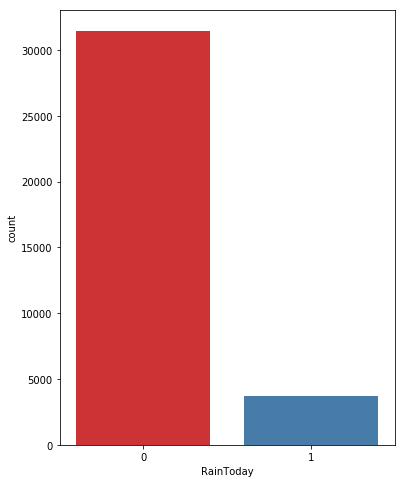

In [89]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainToday", data=df, palette="Set1")
plt.show()

In [90]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_set_train, y_train)
print(X_resampled)
print("------------")
print(y_resampled)

C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module

[[ 1.97513803e-01  4.54631815e-01 -7.50865761e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-6.07590225e-01 -1.01895733e+00 -1.73377071e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.91488144e-01  2.06601959e-01  1.04357154e-03 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 1.17003400e-01 -5.95847576e-01 -9.08130552e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.26025112e+00  2.50371933e-01 -1.60271672e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.62202130e+00 -1.58796700e+00 -1.60271672e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
------------
[0 0 0 ... 1 1 1]


C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\JJJ\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; 

# H. Training xgboost

In [91]:
print(X_resampled.shape, X_train_set_val.shape, df_test_set.shape)

(50376, 228) (7032, 226) (34844, 228)


In [92]:
import xgboost as xgb

### 1) Feature Selection using KNN

In [93]:
# '''
# need to concate train, validation, and test set.
# if don't do, each set will have different attri
# '''

In [94]:
# trainset_end_idx = X_resampled.shape[0]
# validset_end_idx =  X_train_set_val.shape[0]

In [95]:
# dataframe_preKNN = np.vstack([X_resampled, X_train_set_val, df_test_set])

In [96]:
# dataframe_preKNN = transfer_to_df(dataframe_preKNN, X_train_onehot.columns)

In [97]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
feature_imp = pd.Series(clf.feature_importances_,index = X_train_onehot.columns).sort_values(ascending = False)
feature_imp

Humidity9am    0.117426
MinTemp        0.054597
MaxTemp        0.054496
Pressure9am    0.050529
Temp3pm        0.050525
                 ...   
Date_102.0     0.000011
Date_111.0     0.000009
Date_106.0     0.000007
Date_101.0     0.000006
Date_112.0     0.000002
Length: 228, dtype: float64

No handles with labels found to put in legend.


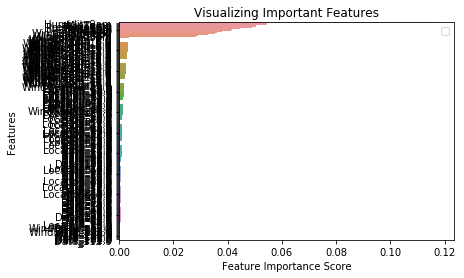

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig('./Importance-Score1.png', dpi = 600)
plt.show()

### 2) select top 25% important attribute for training

In [100]:
## transfer panda series to panda dataframe to get attri
'''
feature_imp --> panda series
'''
# temp = feature_imp
# df_temp = temp.to_frame()

df_feature_imp = feature_imp.to_frame().reset_index()
df_feature_imp

,index,0
0,Humidity9am,0.117426
1,MinTemp,0.054597
2,MaxTemp,0.054496
3,Pressure9am,0.050529
4,Temp3pm,0.050525
...,...,...
223,Date_102.0,0.000011
224,Date_111.0,0.000009
225,Date_106.0,0.000007
226,Date_101.0,0.000006


In [101]:
attri_size = df_feature_imp['index'].count()
print("attributes num: ", attri_size)

attributes num:  228


In [106]:
# select top 10% features

def select_top25(dataframe_imp, attri_num):
    
    top_25 = int(round(attri_num * 0.1))
    print("feature num: ", top_25)
    
    df_temp = dataframe_imp.head(top_25)
    import_attri_list = df_temp['index'].tolist()
    
    return import_attri_list

In [107]:
attri_imp_top25 = select_top25(df_feature_imp, attri_size)
# print("feature num: ", attri_size)
print("select feature: ", attri_imp_top25)

feature num:  23
select feature:  ['Humidity9am', 'MinTemp', 'MaxTemp', 'Pressure9am', 'Temp3pm', 'Humidity3pm', 'Temp9am', 'Cloud9am', 'Sunshine', 'Pressure3pm', 'WindGustSpeed', 'Evaporation', 'Cloud3pm', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am_7.0', 'WindDir9am_8.0', 'WindGustDir_9.0', 'WindDir3pm_6.0', 'WindDir9am_10.0', 'WindDir3pm_8.0', 'WindDir3pm_1.0', 'WindDir9am_1.0']


In [ ]:
# sns.barplot(x=feature_imp, y=feature_imp.index)
# # Add labels to your graph
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title("Visualizing Important Features")
# plt.legend()
# plt.savefig('./Importance-Score1.png', dpi = 600)
# plt.show()

### 3) extract top 25% attri from each data set

transfer data set to dataframe for extracting attribute....

In [108]:
# X_resampled, X_train_set_val, df_test_set

X_train_knn25 = transfer_to_df(X_resampled, X_train_onehot.columns)
X_val_knn25 = transfer_to_df(X_train_set_val, X_val_onehot.columns)
df_test_knn25 = transfer_to_df(df_test_set, df_test_onehot.columns)

In [109]:
X_train_RF = X_train_knn25[attri_imp_top25]
X_val_RF = X_val_knn25[attri_imp_top25]
df_dest_RF = df_test_knn25[attri_imp_top25]

In [110]:
X_train_RF

,Humidity9am,MinTemp,MaxTemp,Pressure9am,Temp3pm,Humidity3pm,Temp9am,Cloud9am,Sunshine,Pressure3pm,...,WindSpeed9am,WindSpeed3pm,WindDir9am_7.0,WindDir9am_8.0,WindGustDir_9.0,WindDir3pm_6.0,WindDir9am_10.0,WindDir3pm_8.0,WindDir3pm_1.0,WindDir9am_1.0
0,0.274958,0.197514,0.454632,0.044437,0.539250,-0.369604,0.431178,-1.469503,1.071270,-0.099191,...,-0.321799,0.081609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.171476,-0.607590,-1.018957,0.150395,-0.975988,2.194688,-1.289793,1.820936,-0.015176,-1.498508,...,0.169475,1.206700,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.418945,-0.591488,0.206602,-1.288073,-0.251704,-1.774361,-0.087644,0.551936,-0.015176,-1.208994,...,0.415113,0.331629,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.502507,1.179741,0.755186,-0.320502,-0.445655,-0.917092,0.940510,0.144436,-2.741847,-0.871228,...,0.169475,0.206619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.212790,1.163639,1.300851,-1.448616,0.605921,-2.560535,1.272683,1.350874,-0.333563,-1.048153,...,0.194039,1.456720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,0.609103,-0.881326,-1.471247,0.850364,-1.385103,1.393418,-1.447971,0.739961,-1.738395,0.919446,...,-0.076162,0.456639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50372,1.013537,1.550089,0.206602,-0.292704,0.114983,0.312512,0.750697,1.820936,-3.143228,-0.710387,...,-0.714819,-0.918472,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
50373,0.525892,0.117003,-0.595848,0.413686,-0.551722,1.010077,-0.403999,0.880811,-0.686778,0.431584,...,-0.567437,-0.918472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50374,0.806606,1.260251,0.250372,-0.315181,0.448336,0.808765,0.905711,1.350874,-1.015910,-0.179611,...,-0.567437,0.206619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [111]:
X_val_RF

,Humidity9am,MinTemp,MaxTemp,Pressure9am,Temp3pm,Humidity3pm,Temp9am,Cloud9am,Sunshine,Pressure3pm,...,WindSpeed9am,WindSpeed3pm,WindDir9am_7.0,WindDir9am_8.0,WindGustDir_9.0,WindDir3pm_6.0,WindDir9am_10.0,WindDir3pm_8.0,WindDir3pm_1.0,WindDir9am_1.0
0,0.638584,-2.170407,-1.217919,0.901800,-1.233045,1.075648,-1.900631,0.611780,-0.014354,0.541737,...,-1.673003,0.166084,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.105685,-1.105754,-1.173519,-0.772696,-1.582970,0.156118,-1.548141,1.344913,-1.737739,-0.876750,...,2.613640,0.958752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.379175,-1.007478,-1.602719,-0.935268,-1.659041,0.408509,-1.403941,1.344913,-0.906951,0.437388,...,-0.938150,0.091771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.256595,1.940792,1.096799,-1.959474,1.216428,-1.346303,1.848581,0.388503,1.046547,-2.001757,...,-0.570723,-0.155938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.338766,-1.662649,-1.351119,-0.236207,-1.263473,0.528802,-1.596208,0.691423,-0.014354,-0.126746,...,-1.673003,-0.032083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.098144,-0.712651,-0.081280,-0.154921,-0.022449,0.793621,-0.811116,1.344913,-0.087059,-0.355008,...,1.266410,0.215625,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7028,0.067467,1.252862,0.173280,0.163721,0.090583,-0.453093,0.662933,1.823118,-3.267428,-0.094137,...,0.776508,-0.169912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7029,-1.479084,1.161138,2.541278,-1.731873,1.998434,-2.637013,3.482853,-1.524317,1.697713,-1.219144,...,0.409081,-0.155938,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.626741,1.793379,0.833359,-0.569992,0.896932,-0.162881,1.640292,-0.089702,0.843058,-0.126746,...,-0.570723,1.206461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_dest_RF

,Humidity9am,MinTemp,MaxTemp,Pressure9am,Temp3pm,Humidity3pm,Temp9am,Cloud9am,Sunshine,Pressure3pm,...,WindSpeed9am,WindSpeed3pm,WindDir9am_7.0,WindDir9am_8.0,WindGustDir_9.0,WindDir3pm_6.0,WindDir9am_10.0,WindDir3pm_8.0,WindDir3pm_1.0,WindDir9am_1.0
0,-0.507584,-1.420355,-0.979535,1.154251,-0.547383,1.392096,-1.240651,0.016135,-0.018841,1.043258,...,-1.680643,-1.790654,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.300408,0.937376,1.119418,-0.383856,1.381660,0.127321,0.934106,-1.962512,1.195829,-0.790119,...,0.800105,-0.566301,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.469112,-0.352764,0.164012,1.235204,0.102753,0.795451,0.029280,0.427407,-0.018841,1.043258,...,-1.680643,0.083356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.671849,-0.920426,-0.262246,0.506627,-0.410030,0.659769,-1.129532,-0.538091,0.307078,0.296927,...,-0.316232,0.083356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.829811,1.921108,1.072383,-1.581961,1.213785,-0.221970,1.292861,-0.538091,-0.298889,-1.536449,...,-0.936419,-0.466353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34839,-0.692495,1.292165,1.237007,-0.011472,1.198523,0.226170,1.061099,0.174290,1.115034,-0.791224,...,2.660666,-0.566301,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34840,-1.313366,1.630827,1.707360,0.004718,1.625843,-1.087491,1.191267,0.016135,-1.187640,-1.471551,...,-0.564306,-1.165984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34841,0.513558,-0.591440,-0.247547,0.336116,-0.113959,1.806962,-0.478693,0.016135,-0.018841,0.734991,...,-0.936419,-0.666248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34842,-0.555909,0.324560,-0.512121,-0.157188,-0.464972,-1.336354,0.124525,-0.617168,-0.016104,-0.449403,...,0.800105,-0.041578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4) start training xgboost

In [113]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=500, max_depth=5)
xgb_model.fit(X_train_RF, y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [114]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

    print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix


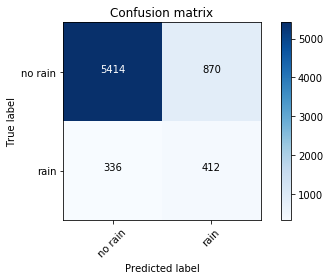

In [115]:
y_pred_valid = xgb_model.predict(X_val_RF)
cnf_matrix = confusion_matrix(y_val, y_pred_valid)    

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, ['no rain', 'rain'], title='Confusion matrix')
plt.show()

In [116]:
print('f1-score: %f' % f1_score(y_val, y_pred_valid))

f1-score: 0.405911


# I. Train whole data set

In [119]:
X_train_set = np.vstack([X_train_RF, X_val_RF])
Y = np.hstack([y_resampled, y_val])

In [120]:
xgb_model_all = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=500, max_depth=5)
xgb_model_all.fit(X_train_set, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [121]:
ans_pred_val = xgb_model.predict(df_dest_RF)
df_sap = pd.DataFrame(ans_pred_val.astype(int), columns = ['RainToday'])
df_sap.to_csv('myAns_0513_final_1.csv',  index_label = 'Id')

In [124]:
ans_pred_all = xgb_model_all.predict(df_test_set)
df_sap_all = pd.DataFrame(ans_pred_all.astype(int), columns = ['RainToday'])
df_sap_all.to_csv('myAns_0513_final_2.csv',  index_label = 'Id')

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227']
training data did not have the following fields: f75, f145, f162, f216, f125, f226, f227, f126, f206, f151, f43, f211, f222, f121, f201, f34, f192, f33, f140, f176, f204, f208, f165, f186, f40, f122, f167, f183, f55, f41, f116, f198, f63, f213, f48, f62, f218, f179, f220, f143, f50, f70, f196, f139, f31, f95, f154, f166, f171, f32, f188, f52, f24, f69, f76, f109, f23, f101, f89, f100, f112, f81, f113, f169, f189, f78, f118, f202, f94, f49, f61, f124, f84, f127, f83, f137, f212, f67, f153, f99, f98, f91, f114, f35, f88, f38, f39, f160, f135, f182, f42, f45, f60, f144, f155, f72, f120, f180, f106, f132, f111, f187, f103, f148, f110, f108, f200, f158, f210, f223, f51, f37, f59, f92, f107, f93, f115, f119, f191, f87, f74, f131, f57, f117, f178, f26, f47, f105, f193, f71, f185, f214, f136, f58, f175, f104, f66, f221, f190, f142, f90, f149, f170, f205, f184, f150, f64, f174, f77, f181, f152, f157, f28, f209, f138, f161, f54, f173, f29, f73, f134, f82, f97, f172, f147, f46, f129, f156, f128, f164, f224, f146, f30, f207, f194, f130, f203, f36, f79, f80, f219, f215, f56, f85, f199, f25, f197, f123, f141, f86, f68, f65, f44, f96, f177, f195, f27, f133, f159, f168, f217, f53, f225, f102, f163

# J. Save model

In [125]:
import sys
import pickle
import os

In [126]:
#save model
output = open('model_xgbvalid_0513_final_1.pkl', 'wb')
pickle.dump(xgb_model, output)
output.close()

In [127]:
output = open('model_xgball_0513_final_2.pkl', 'wb')
pickle.dump(xgb_model_all, output)
output.close()